# **The following is the model that is going to predict whether to turn on the Irrigationgation for irrigation or not.**

Import all the required libraries

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [57]:
data = pd.read_csv('data.csv')

In [58]:
data

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
0,Wheat,10,400,30,15,0
1,Wheat,7,200,30,32,0
2,Wheat,9,300,21,28,0
3,Wheat,3,500,40,22,0
4,Wheat,2,700,23,34,0
...,...,...,...,...,...,...
496,Coffee,93,675,25,19,1
497,Coffee,95,210,23,17,0
498,Coffee,97,398,25,18,0
499,Coffee,99,678,24,18,1


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CropType      501 non-null    object
 1   CropDays      501 non-null    int64 
 2   SoilMoisture  501 non-null    int64 
 3   temperature   501 non-null    int64 
 4   Humidity      501 non-null    int64 
 5   Irrigation    501 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ KB


In [60]:
data.describe()

,CropDays,SoilMoisture,temperature,Humidity,Irrigation
count,501.000000,501.000000,501.000000,501.000000,501.000000
mean,64.053892,411.391218,24.682635,39.381238,0.393214
std,45.935554,199.099590,12.111527,22.618231,0.488952
min,1.000000,120.000000,14.000000,11.000000,0.000000
25%,27.000000,230.000000,20.000000,19.000000,0.000000
50%,57.000000,369.000000,24.000000,32.000000,0.000000
75%,90.000000,554.000000,28.000000,65.000000,1.000000
max,210.000000,990.000000,263.000000,85.000000,1.000000


In [61]:
data = data.drop('CropDays', axis=1)

In [62]:
data['SoilMoisture'] = data['SoilMoisture'].astype(float)
data['temperature'] = data['temperature'].astype(float)
data['Humidity'] = data['Humidity'].astype(float)
data['Irrigation'] = data['Irrigation'].astype(bool)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CropType      501 non-null    object 
 1   SoilMoisture  501 non-null    float64
 2   temperature   501 non-null    float64
 3   Humidity      501 non-null    float64
 4   Irrigation    501 non-null    bool   
dtypes: bool(1), float64(3), object(1)
memory usage: 16.3+ KB


to encode the croptype:

In [63]:
data['CropType'].unique()

array(['Wheat', 'Groundnuts', 'Garden Flowers', 'Maize', 'Paddy',
       'Potato', 'Pulse', 'Sugarcane', 'Coffee'], dtype=object)

In [64]:
data = pd.get_dummies(data, columns=['CropType'], prefix=['CropType'])

data

,SoilMoisture,temperature,Humidity,Irrigation,CropType_Coffee,CropType_Garden Flowers,CropType_Groundnuts,CropType_Maize,CropType_Paddy,CropType_Potato,CropType_Pulse,CropType_Sugarcane,CropType_Wheat
0,400.0,30.0,15.0,False,0,0,0,0,0,0,0,0,1
1,200.0,30.0,32.0,False,0,0,0,0,0,0,0,0,1
2,300.0,21.0,28.0,False,0,0,0,0,0,0,0,0,1
3,500.0,40.0,22.0,False,0,0,0,0,0,0,0,0,1
4,700.0,23.0,34.0,False,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,675.0,25.0,19.0,True,1,0,0,0,0,0,0,0,0
497,210.0,23.0,17.0,False,1,0,0,0,0,0,0,0,0
498,398.0,25.0,18.0,False,1,0,0,0,0,0,0,0,0
499,678.0,24.0,18.0,True,1,0,0,0,0,0,0,0,0


In [65]:
boolean_columns = ['CropType_Coffee', 'CropType_Garden Flowers', 'CropType_Groundnuts',
                   'CropType_Maize', 'CropType_Paddy', 'CropType_Potato', 'CropType_Pulse',
                   'CropType_Sugarcane', 'CropType_Wheat']

data[boolean_columns] = data[boolean_columns].astype(bool)


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SoilMoisture             501 non-null    float64
 1   temperature              501 non-null    float64
 2   Humidity                 501 non-null    float64
 3   Irrigation               501 non-null    bool   
 4   CropType_Coffee          501 non-null    bool   
 5   CropType_Garden Flowers  501 non-null    bool   
 6   CropType_Groundnuts      501 non-null    bool   
 7   CropType_Maize           501 non-null    bool   
 8   CropType_Paddy           501 non-null    bool   
 9   CropType_Potato          501 non-null    bool   
 10  CropType_Pulse           501 non-null    bool   
 11  CropType_Sugarcane       501 non-null    bool   
 12  CropType_Wheat           501 non-null    bool   
dtypes: bool(10), float64(3)
memory usage: 16.8 KB


Let us vizulaize the data we have:

<Axes: >

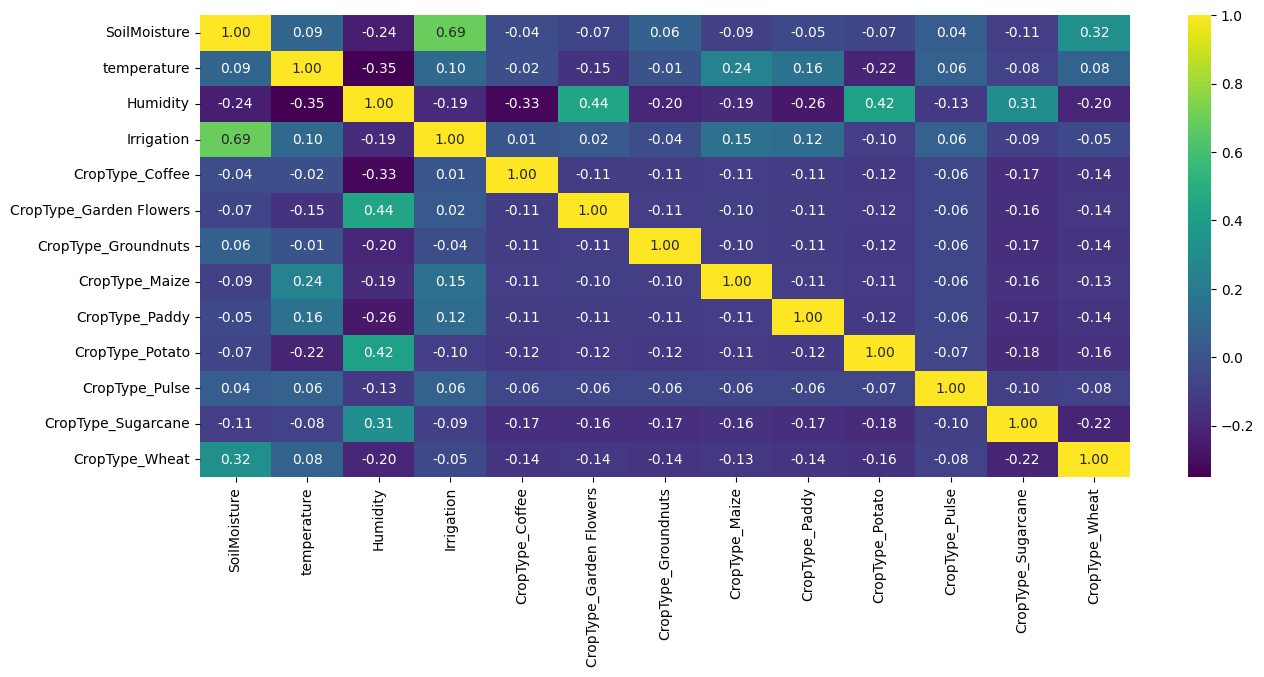

In [67]:
plt.figure(figsize = (15,6))
sns.heatmap(data.corr(), cmap='viridis', annot=True, fmt='.2f')

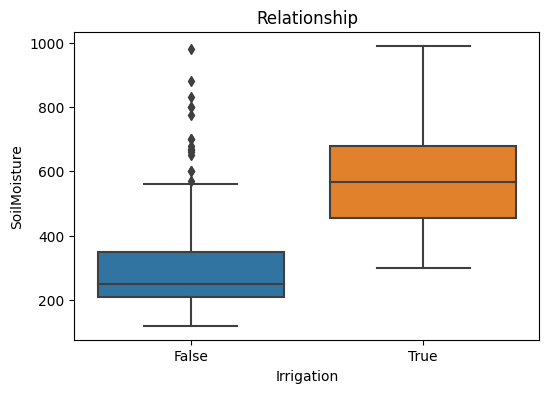

In [68]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Irrigation', y='SoilMoisture', data=data)
plt.title('Relationship')
plt.show()

It can be observed that the outliers exist.
Let us remove outliers.

In [69]:
min = data['SoilMoisture'].min()
max = data['SoilMoisture'].max()
print(min)
print(max)
print("Upper limit",data['SoilMoisture'].mean() + 3*data['SoilMoisture'].std())
print("Lower limit",data['SoilMoisture'].mean() - 3*data['SoilMoisture'].std())
s = data['SoilMoisture'].describe()
a = data['SoilMoisture'].mean()
b = data['SoilMoisture'].std()
data['zscore'] = (data['SoilMoisture'] - a)/b

120.0
990.0
Upper limit 1008.6899868457313
Lower limit -185.90755171599068


In [70]:
data = data.loc[(abs(data['zscore']))<1]
data

,SoilMoisture,temperature,Humidity,Irrigation,CropType_Coffee,CropType_Garden Flowers,CropType_Groundnuts,CropType_Maize,CropType_Paddy,CropType_Potato,CropType_Pulse,CropType_Sugarcane,CropType_Wheat,zscore
0,400.0,30.0,15.0,False,False,False,False,False,False,False,False,False,True,-0.057214
2,300.0,21.0,28.0,False,False,False,False,False,False,False,False,False,True,-0.559475
3,500.0,40.0,22.0,False,False,False,False,False,False,False,False,False,True,0.445048
6,500.0,33.0,26.0,False,False,False,False,False,False,False,False,False,True,0.445048
7,350.0,21.0,28.0,False,False,False,False,False,False,False,False,False,True,-0.308344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,230.0,22.0,18.0,False,True,False,False,False,False,False,False,False,False,-0.911058
489,369.0,21.0,17.0,False,True,False,False,False,False,False,False,False,False,-0.212915
492,398.0,22.0,17.0,False,True,False,False,False,False,False,False,False,False,-0.067259
495,310.0,23.0,18.0,False,True,False,False,False,False,False,False,False,False,-0.509249


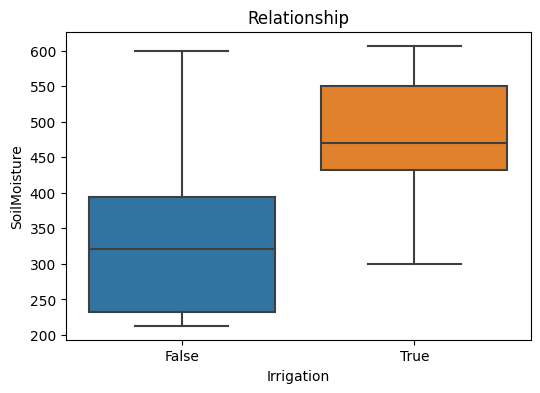

In [71]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Irrigation', y='SoilMoisture', data=data)
plt.title('Relationship')
plt.show()

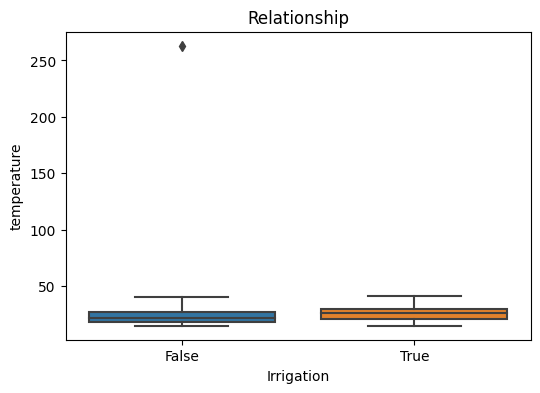

In [72]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Irrigation', y='temperature', data=data)
plt.title('Relationship')
plt.show()

It can be observed that the outliers exist.
Let us remove outliers.

In [73]:
min = data['temperature'].min()
max = data['temperature'].max()
print(min)
print(max)
print("Upper limit",data['temperature'].mean() + 3*data['temperature'].std())
print("Lower limit",data['temperature'].mean() - 3*data['temperature'].std())
s = data['temperature'].describe()
a = data['temperature'].mean()
b = data['temperature'].std()
data['zscore'] = (data['temperature'] - a)/b

15.0
263.0
Upper limit 68.69263451781559
Lower limit -19.07238135325863


In [74]:
data = data.loc[(abs(data['zscore']))<1]
data

,SoilMoisture,temperature,Humidity,Irrigation,CropType_Coffee,CropType_Garden Flowers,CropType_Groundnuts,CropType_Maize,CropType_Paddy,CropType_Potato,CropType_Pulse,CropType_Sugarcane,CropType_Wheat,zscore
0,400.0,30.0,15.0,False,False,False,False,False,False,False,False,False,True,0.354802
2,300.0,21.0,28.0,False,False,False,False,False,False,False,False,False,True,-0.260477
6,500.0,33.0,26.0,False,False,False,False,False,False,False,False,False,True,0.559896
7,350.0,21.0,28.0,False,False,False,False,False,False,False,False,False,True,-0.260477
9,543.0,25.0,53.0,False,False,False,False,False,False,False,False,False,True,0.012981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,230.0,22.0,18.0,False,True,False,False,False,False,False,False,False,False,-0.192113
489,369.0,21.0,17.0,False,True,False,False,False,False,False,False,False,False,-0.260477
492,398.0,22.0,17.0,False,True,False,False,False,False,False,False,False,False,-0.192113
495,310.0,23.0,18.0,False,True,False,False,False,False,False,False,False,False,-0.123748


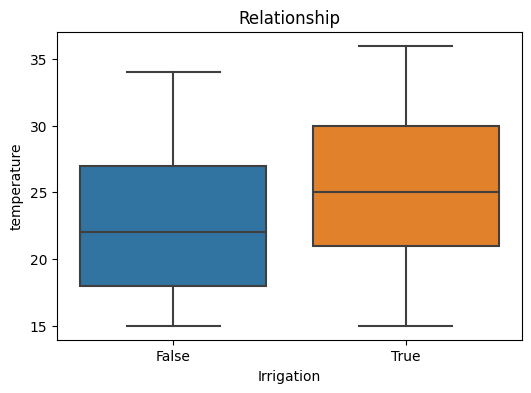

In [75]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Irrigation', y='temperature', data=data)
plt.title('Relationship')
plt.show()

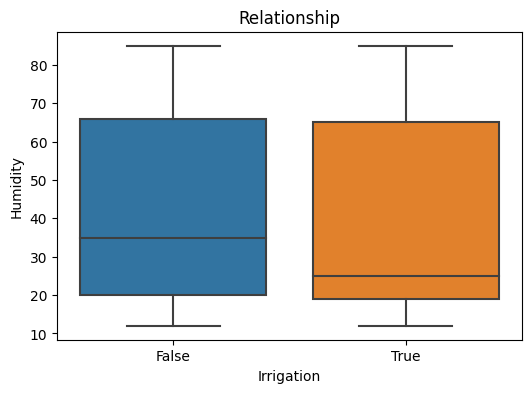

In [76]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Irrigation', y='Humidity', data=data)

plt.title('Relationship')
plt.show()

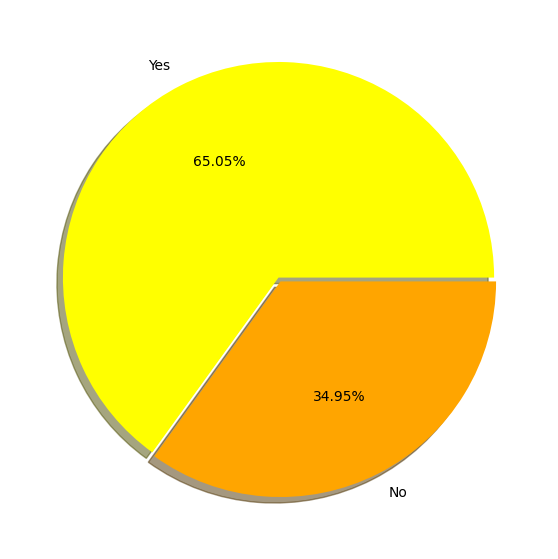

In [77]:
size = data['Irrigation'].value_counts()
labels = ['Yes', 'No']
color = ['yellow', 'orange']
explode = [0.01, 0.01]

plt.figure(figsize = (7,7))
plt.pie(size, labels=labels, colors=color, explode=explode, autopct='%.2f%%', shadow = True)
plt.show()

In [78]:
data = data.drop('zscore', axis=1)
data

,SoilMoisture,temperature,Humidity,Irrigation,CropType_Coffee,CropType_Garden Flowers,CropType_Groundnuts,CropType_Maize,CropType_Paddy,CropType_Potato,CropType_Pulse,CropType_Sugarcane,CropType_Wheat
0,400.0,30.0,15.0,False,False,False,False,False,False,False,False,False,True
2,300.0,21.0,28.0,False,False,False,False,False,False,False,False,False,True
6,500.0,33.0,26.0,False,False,False,False,False,False,False,False,False,True
7,350.0,21.0,28.0,False,False,False,False,False,False,False,False,False,True
9,543.0,25.0,53.0,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,230.0,22.0,18.0,False,True,False,False,False,False,False,False,False,False
489,369.0,21.0,17.0,False,True,False,False,False,False,False,False,False,False
492,398.0,22.0,17.0,False,True,False,False,False,False,False,False,False,False
495,310.0,23.0,18.0,False,True,False,False,False,False,False,False,False,False


In [79]:
df = data

In [80]:
x = df.drop('Irrigation', axis=1)  #Features: moisture, temp, humidity
y = df['Irrigation']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [82]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (247, 12)
Training Labels Shape: (247,)
Testing Features Shape: (62, 12)
Testing Labels Shape: (62,)


<Axes: >

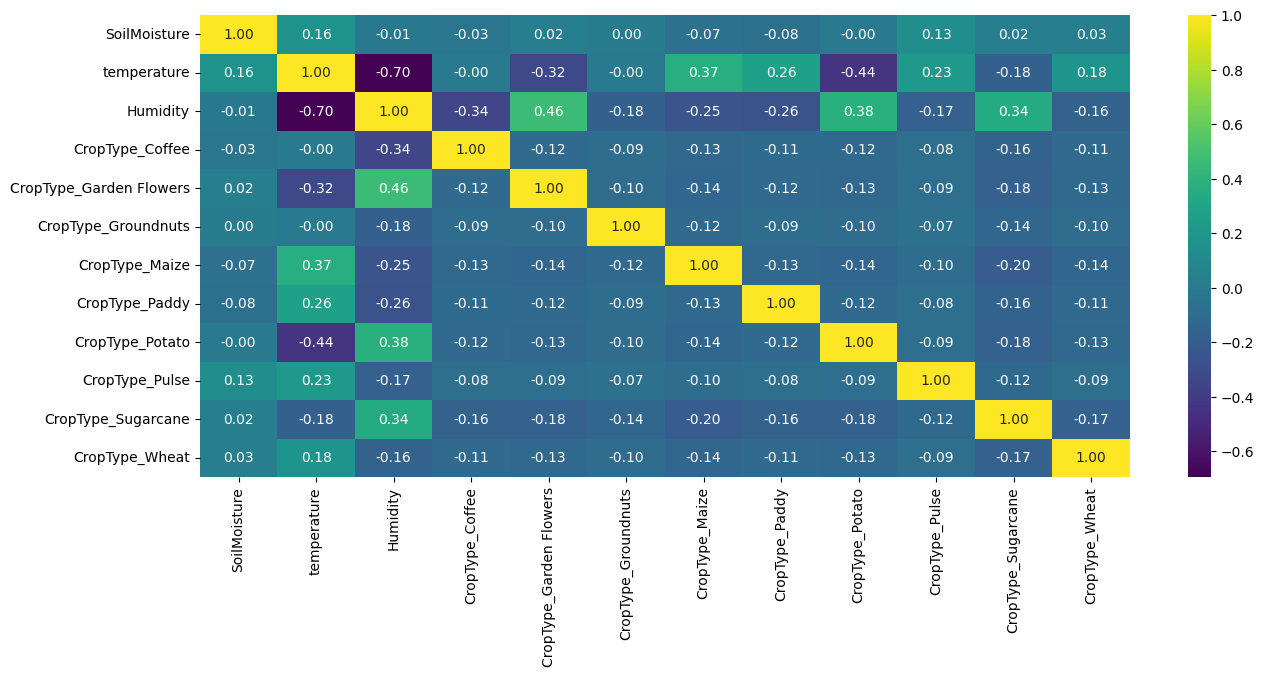

In [83]:
plt.figure(figsize = (15,6))
sns.heatmap(x_train.corr(), cmap='viridis', annot=True, fmt='.2f')

In [84]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Naive Bayes', GaussianNB()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('MLP Neural Network', MLPClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier())
]

results = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = 2 * (precision * recall) / (precision + recall)

    results.append((name, accuracy, precision, recall, f1))

df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(df_results)

                  Model  Accuracy  Precision    Recall  F1 Score
0   Logistic Regression  0.903226   0.941176  0.761905  0.842105
1         Decision Tree  0.935484   0.947368  0.857143  0.900000
2         Random Forest  0.951613   1.000000  0.857143  0.923077
3                   SVM  0.806452   0.764706  0.619048  0.684211
4           Naive Bayes  0.870968   0.782609  0.857143  0.818182
5     Gradient Boosting  0.967742   1.000000  0.904762  0.950000
6   K-Nearest Neighbors  0.758065   0.666667  0.571429  0.615385
7    MLP Neural Network  0.677419   0.512821  0.952381  0.666667
8              AdaBoost  0.903226   0.894737  0.809524  0.850000
9               XGBoost  0.935484   1.000000  0.809524  0.894737
10             LightGBM  0.951613   0.950000  0.904762  0.926829


In [85]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in metrics:
    max_index = df_results[metric].idxmax()
    max_model = df_results.loc[max_index, 'Model']
    max_value = df_results.loc[max_index, metric]
    print(f"Highest {metric} - Model: {max_model}, Value: {max_value*100}")


Highest Accuracy - Model: Gradient Boosting, Value: 96.7741935483871
Highest Precision - Model: Random Forest, Value: 100.0
Highest Recall - Model: MLP Neural Network, Value: 95.23809523809523
Highest F1 Score - Model: Gradient Boosting, Value: 95.0


HENCE Decision Tree & Gradient Boosting are BEST MODELs TO FOLLOW HERE

# Gradient Boost Analysis

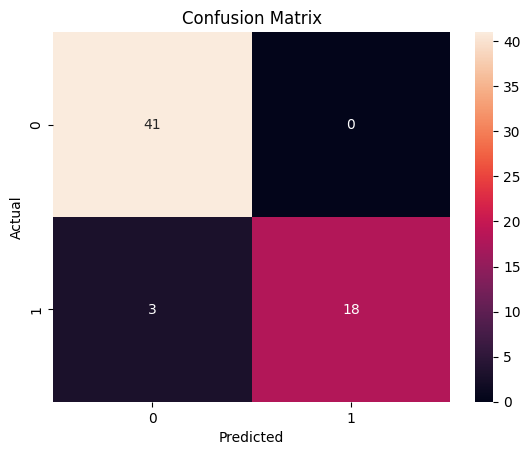

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Gradient Boosting classifier
model = GradientBoostingClassifier()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [87]:
tp = cm[1, 1]  # True Positive
tn = cm[0, 0]  # True Negative
fp = cm[0, 1]  # False Positive
fn = cm[1, 0]  # False Negative

accuracy_gb = (tp + tn) / (tp + tn + fp + fn)
precision_gb = tp / (tp + fp) if (tp + fp) != 0 else 0
recall_gb = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score_gb = 2 * (precision_gb * recall_gb) / (precision_gb + recall_gb) if (precision_gb + recall_gb) != 0 else 0

print('Accuracy:', accuracy_gb*100)
print('Precision:', precision_gb*100)
print('Recall:', recall_gb*100)
print('F1-Score:', f1_score_gb*100)

Accuracy: 95.16129032258065
Precision: 100.0
Recall: 85.71428571428571
F1-Score: 92.3076923076923


Let us visualize Gradient Boost

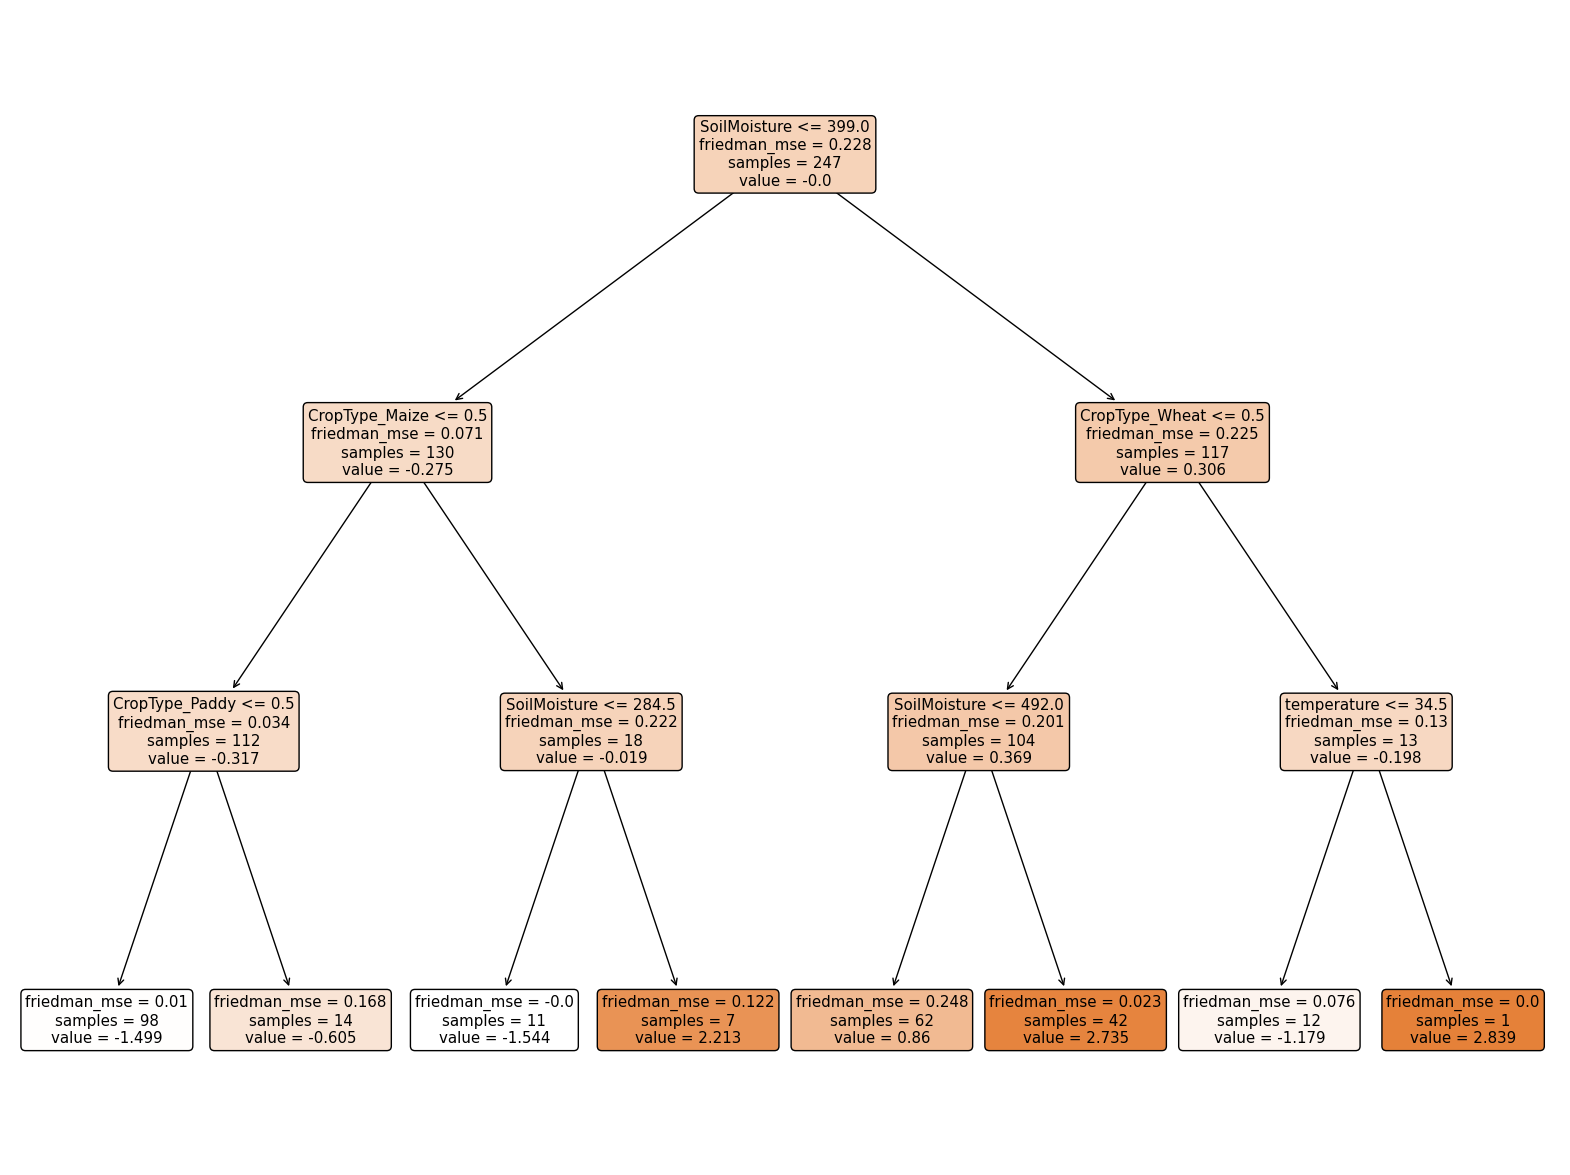

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a Gradient Boosting classifier
clf = GradientBoostingClassifier()

# Train the model
clf.fit(x_train, y_train)

# Increase the size of the figure
plt.figure(figsize=(20, 15))

# Visualize the decision tree with more readability
plot_tree(clf.estimators_[0][0], filled=True, rounded=True, feature_names=x.columns, class_names=['0', '1'])

plt.show()


# Decision Tree Analysis

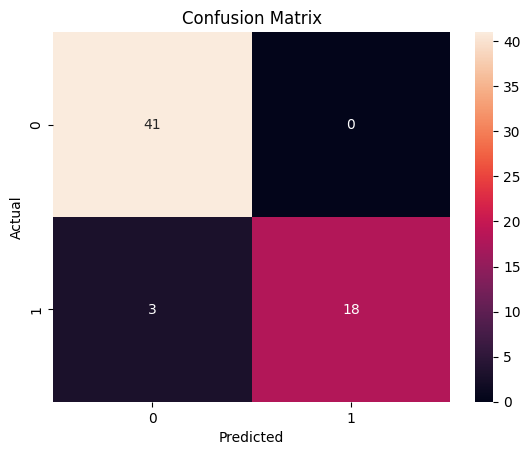

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(x_test)

# Create the confusion matrix
ll = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(ll, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [90]:
tp = ll[1, 1]  # True Positive
tn = ll[0, 0]  # True Negative
fp = ll[0, 1]  # False Positive
fn = ll[1, 0]  # False Negative

accuracy_dt = (tp + tn) / (tp + tn + fp + fn)
precision_dt = tp / (tp + fp) if (tp + fp) != 0 else 0
recall_dt = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score_dt = 2 * (precision_dt * recall_dt) / (precision_dt + recall_dt) if (precision_dt + recall_dt) != 0 else 0

print('Accuracy:', accuracy_dt*100)
print('Precision:', precision_dt*100)
print('Recall:', recall_dt*100)
print('F1-Score:', f1_score_dt*100)

Accuracy: 95.16129032258065
Precision: 100.0
Recall: 85.71428571428571
F1-Score: 92.3076923076923


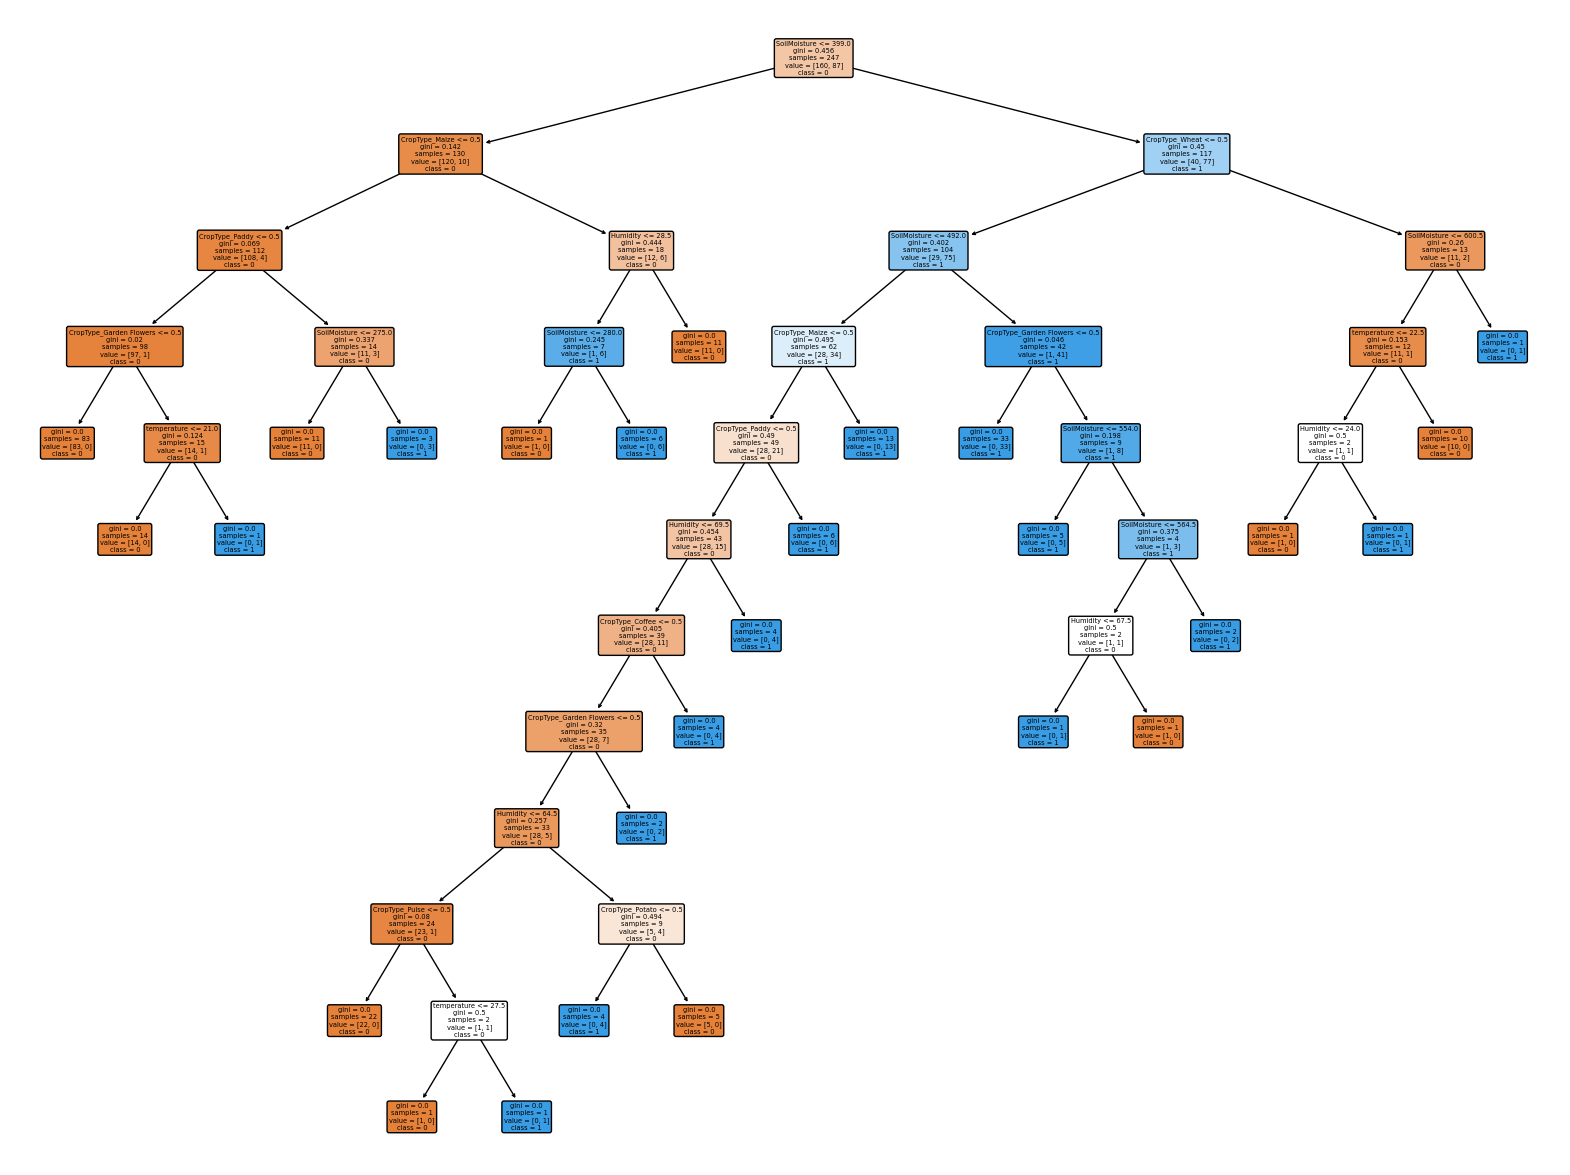

In [91]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(x_train, y_train)

# Increase the size of the figure
plt.figure(figsize=(20, 15))

# Visualize the decision tree
plot_tree(clf, filled=True, rounded=True, feature_names=x.columns, class_names=['0', '1'])

plt.show()


#Let us start Hybriding the algo

In [92]:
from sklearn.ensemble import VotingClassifier
# Create the individual models
decision_tree = DecisionTreeClassifier()
gradient_boosting = GradientBoostingClassifier()

# Train the individual models
decision_tree.fit(x_train, y_train)
gradient_boosting.fit(x_train, y_train)

# Make predictions on the test data for each model
y_pred_dt = decision_tree.predict(x_test)
y_pred_gb = gradient_boosting.predict(x_test)

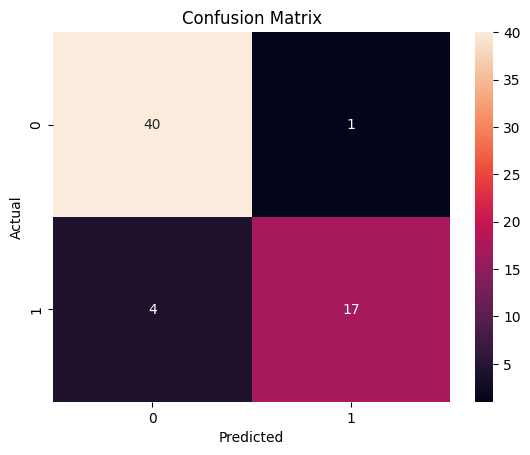

In [93]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

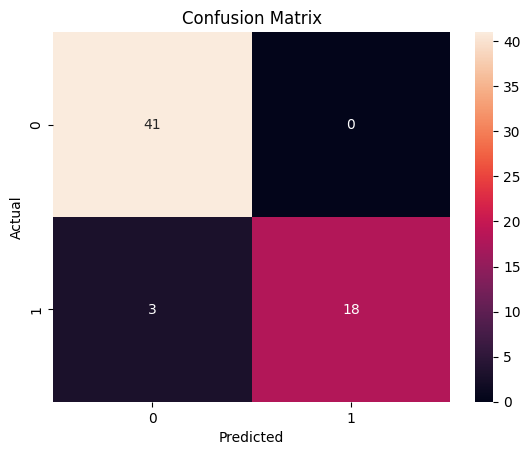

In [94]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [95]:
hybrid_model = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('gradient_boosting', gradient_boosting)
], voting='hard')

# Train the hybrid model
hybrid_model.fit(x_train, y_train)

# Make predictions using the hybrid model
y_pred_hybrid = hybrid_model.predict(x_test)

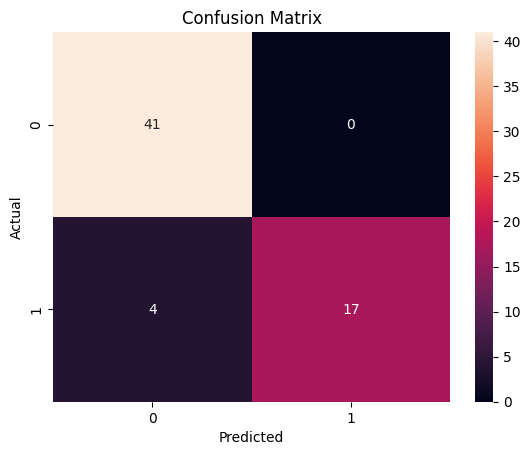

In [96]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_hybrid)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [97]:
moisture = 400
temp = 30
humidity = 15

In [98]:
tp = cm[1, 1]  # True Positive
tn = cm[0, 0]  # True Negative
fp = cm[0, 1]  # False Positive
fn = cm[1, 0]  # False Negative

accuracy_hybrid = (tp + tn) / (tp + tn + fp + fn)
precision_hybrid = tp / (tp + fp) if (tp + fp) != 0 else 0
recall_hybrid = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score_hybrid = 2 * (precision_hybrid * recall_hybrid) / (precision_hybrid + recall_hybrid) if (precision_hybrid + recall_hybrid) != 0 else 0

print('Accuracy:', accuracy_hybrid*100)
print('Precision:', precision_hybrid*100)
print('Recall:', recall_hybrid*100)
print('F1-Score:', f1_score_hybrid*100)

Accuracy: 93.54838709677419
Precision: 100.0
Recall: 80.95238095238095
F1-Score: 89.47368421052632


In [100]:
# Print the performance metrics of each model
print("Decision Tree - Accuracy:", accuracy_dt, "Precision:", precision_dt, "Recall:", recall_dt, "F1 Score:", f1_score_dt)
print("Gradient Boosting - Accuracy:", accuracy_gb, "Precision:", precision_gb, "Recall:", recall_gb, "F1 Score:", f1_score_gb)

# Print the performance metrics of the hybrid model
print("Hybrid Model - Accuracy:", accuracy_hybrid, "Precision:", precision_hybrid, "Recall:", recall_hybrid, "F1 Score:", f1_score_hybrid)

Decision Tree - Accuracy: 0.9516129032258065 Precision: 1.0 Recall: 0.8571428571428571 F1 Score: 0.923076923076923
Gradient Boosting - Accuracy: 0.9516129032258065 Precision: 1.0 Recall: 0.8571428571428571 F1 Score: 0.923076923076923
Hybrid Model - Accuracy: 0.9354838709677419 Precision: 1.0 Recall: 0.8095238095238095 F1 Score: 0.8947368421052632


Let us predict irrigation nature for an user input value.

In [109]:
crop_type = input("Enter the CropType: ")


Enter the CropType: Coffee


In [110]:
# Create the input DataFrame
input_data = pd.DataFrame([[moisture, temp, humidity] + [0] * 9], columns=x.columns)
input_data[f'CropType_{crop_type}'] = 1

prediction = hybrid_model.predict(input_data)

# Convert prediction into descriptive output
if prediction[0]:
    print("Turn off the Irrigation System.")
else:
    print("Turn on the Irrigation System.")


Turn on the Irrigation System.
